### Packages

In [12]:
import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json


### Single dot area

In [55]:
cwd = os.getcwd() # get current working directory
parent_dir = os.path.dirname(os.path.dirname(cwd)) # Get the parent directory
param_path = os.path.join(parent_dir, 'experiment', 'stimuli', 'visual', 'param.json') # specify the paramter's path

# import variables from param.json
with open(param_path) as f: # The file object is referenced as f during the block.
    param = json.load(f)
globals().update(param) # create the param for variables



# Numeoristy vector 1260 * 1
num_vector = [i for i in numerosities for _ in range(total_n_trials)]

# radius vector for each numerosity (70 trials * 3 condition = 210 * 1)
radius_dict = {}
# Loop over the keys '1' to '6' (or as many as you need)
for i in numerosities:  
    num_key = str(i)  # Convert loop index to string to match your dictionary keys
    # Concatenate the lists for the current key
    radius_dict[num_key] = np.concatenate((
        [singledotsize_cont_radius_px[num_key] for _ in range(n_trials)],
        [totaldotsize_cont_radius_px[num_key] for _ in range(n_trials)],
        [circumference_cont_radius_px[num_key] for _ in range(n_trials)]
    ), axis=0)
# ~~~~~~~~~~~~~~~~ Single dot area 



In [54]:

print(numerosity)
type(numerosity)

[1, 2, 3, 4, 5, 6]


list

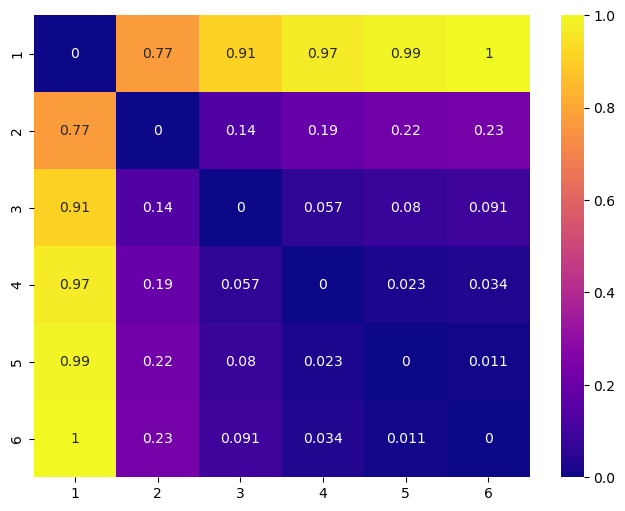

In [23]:
# Define the range of numerosities
numerosities = [i for i in range(1, 7) for _ in range(210)]
single_dot_area = [90, 22, 10, 5, 3, 2]

# Initialize an empty RDM matrix
n = len(numerosities)
RDM = np.zeros((n, n))

# Compute the Euclidean distance between each pair of numerosities
for i in range(n):
    for j in range(n):
        RDM[i, j] = np.abs(single_dot_area[i] - single_dot_area[j])

# Optional: Normalize the RDM
RDM = RDM / np.max(RDM)

# Visualize the RDM using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(RDM, annot=True, cmap="plasma", xticklabels=numerosities, yticklabels=numerosities)
plt.savefig('/Users/muku/Desktop/RDM_singledotarea_circumcont.png', format='png', bbox_inches='tight', pad_inches=0.2)
plt.show()